In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import math

In [2]:
url = "uber.csv"
df = pd.read_csv(url)

print("Dataset Loaded Successfully ")
print(df.head())
print(df.info())

Dataset Loaded Successfully 
   Unnamed: 0                            key  fare_amount  \
0    24238194    2015-05-07 19:52:06.0000003          7.5   
1    27835199    2009-07-17 20:04:56.0000002          7.7   
2    44984355   2009-08-24 21:45:00.00000061         12.9   
3    25894730    2009-06-26 08:22:21.0000001          5.3   
4    17610152  2014-08-28 17:47:00.000000188         16.0   

           pickup_datetime  pickup_longitude  pickup_latitude  \
0  2015-05-07 19:52:06 UTC        -73.999817        40.738354   
1  2009-07-17 20:04:56 UTC        -73.994355        40.728225   
2  2009-08-24 21:45:00 UTC        -74.005043        40.740770   
3  2009-06-26 08:22:21 UTC        -73.976124        40.790844   
4  2014-08-28 17:47:00 UTC        -73.925023        40.744085   

   dropoff_longitude  dropoff_latitude  passenger_count  
0         -73.999512         40.723217                1  
1         -73.994710         40.750325                1  
2         -73.962565         40.772647 

In [3]:
df = df.dropna()

if 'Unnamed: 0' in df.columns:
    df = df.drop('Unnamed: 0', axis=1)

df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], errors='coerce')

df['hour'] = df['pickup_datetime'].dt.hour
df['day'] = df['pickup_datetime'].dt.day
df['month'] = df['pickup_datetime'].dt.month
df['year'] = df['pickup_datetime'].dt.year

df = df.drop('pickup_datetime', axis=1)

print("\nAfter preprocessing:")
print(df.head())


After preprocessing:
                             key  fare_amount  pickup_longitude  \
0    2015-05-07 19:52:06.0000003          7.5        -73.999817   
1    2009-07-17 20:04:56.0000002          7.7        -73.994355   
2   2009-08-24 21:45:00.00000061         12.9        -74.005043   
3    2009-06-26 08:22:21.0000001          5.3        -73.976124   
4  2014-08-28 17:47:00.000000188         16.0        -73.925023   

   pickup_latitude  dropoff_longitude  dropoff_latitude  passenger_count  \
0        40.738354         -73.999512         40.723217                1   
1        40.728225         -73.994710         40.750325                1   
2        40.740770         -73.962565         40.772647                1   
3        40.790844         -73.965316         40.803349                3   
4        40.744085         -73.973082         40.761247                5   

   hour  day  month  year  
0    19    7      5  2015  
1    20   17      7  2009  
2    21   24      8  2009  
3     

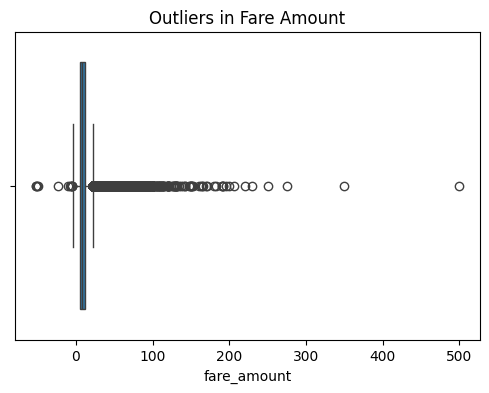

In [4]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['fare_amount'])
plt.title("Outliers in Fare Amount")
plt.show()

df = df[(df['fare_amount'] > 0) & (df['fare_amount'] <= 100)]

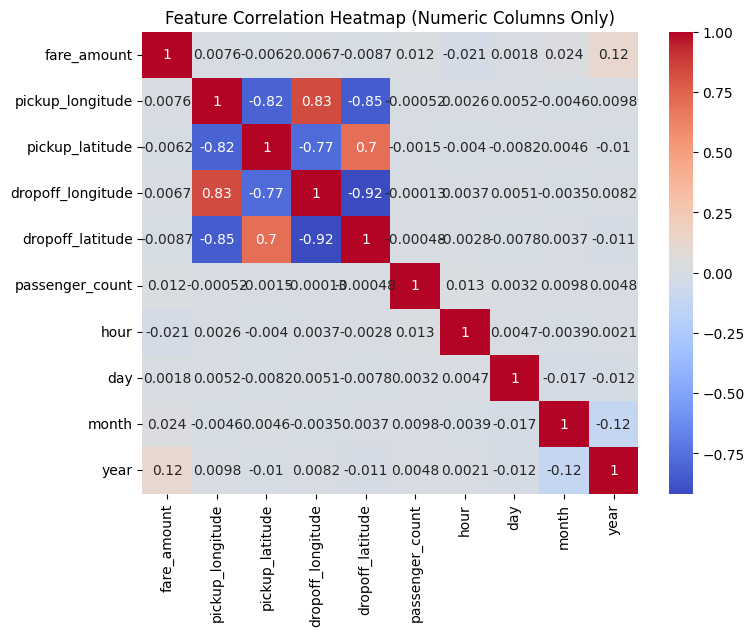

In [5]:
numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap (Numeric Columns Only)")
plt.show()

In [6]:
X = df[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
        'dropoff_latitude', 'passenger_count', 'hour', 'day', 'month', 'year']]
y = df['fare_amount']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\nData Split Successful")


Data Split Successful


In [8]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [9]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [12]:
r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = math.sqrt(mean_squared_error(y_test, y_pred_lr))

r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = math.sqrt(mean_squared_error(y_test, y_pred_rf))

print("\nModel Evaluation Results")
print("Linear Regression:")
print("  R² Score:", round(r2_lr, 3))
print("  RMSE:", round(rmse_lr, 3))

print("\nRandom Forest Regressor:")
print("  R² Score:", round(r2_rf, 3))
print("  RMSE:", round(rmse_rf, 3))


📊 Model Evaluation Results 📊
Linear Regression:
  R² Score: 0.016
  RMSE: 9.262

Random Forest Regressor:
  R² Score: 0.817
  RMSE: 3.995


In [13]:
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'R2 Score': [r2_lr, r2_rf],
    'RMSE': [rmse_lr, rmse_rf]
})
print("\nModel Comparison:\n", results)


Model Comparison:
                Model  R2 Score      RMSE
0  Linear Regression  0.016427  9.262296
1      Random Forest  0.816978  3.995463
